<a href="https://colab.research.google.com/github/Mr-big-cake/Fundamental_AI/blob/main/Lab_5/AI_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from typing import Mapping
import copy

#Распределения

In [ ]:
def uniform_distribution(alpha: float = 0., beta: float = 1.) -> float: # Равномерное распределение
  return random.uniform(0, 1) * (beta - alpha) + alpha

def exponential_distribution(alpha: float = 0.1) -> float: #Экспоненциальное распределение
  return math.log(1 / (1 - random.uniform(0, 1))) / alpha

def Weibull_distribution(alpha: float = 1.0, k: float = 1.5) -> float: #Вейбула
  return (math.log(1 / (1 - random.uniform(0, 1))) / alpha ** k) ** (1 / k)  

#Семплирование

In [ ]:
def uniform_sample(alpha: float = 0., beta: float = 1., count: int = 100) -> list: #Используя uniform_generator, семплировать несколькот точек
  return [uniform_distribution(alpha, beta) for i in range(count)]

def exponential_sample(alpha: float = 0.1, beta: float = 0., count: int = 100) -> list:#Используя exponential_distribution, семплировать несколькот точек
  return [exponential_distribution(alpha) for i in range(count)]

def Weibull_sample(alpha: float = 1., beta: float = 1.5, count: int = 100) -> list:
  return [Weibull_distribution(alpha, beta) for i in range(count)]

In [ ]:
def Cauchy(x: float) -> float:
  return 1 / (math.pi * (1 + x ** 2))

def ParzenRosenblatt(x: float, h: float, data: list) -> float:
  return sum([Cauchy((x - i) / h) for i in data]) / (len(data) * h)

In [ ]:
def plot(sampler: Mapping, alpha: float = 1., beta: float = 1.5,
            h: float = 0.3, count: int = 5000):
  data = sampler(alpha=alpha, beta=beta, count=count)
  x = np.linspace(min(data), max(data), count)
  fig, ax = plt.subplots(figsize=(14, 12))
  ax.plot(x, ParzenRosenblatt(x, h, data))
  ax.set_xlim((min(data), max(data)))
  ax.set_xlabel('x')
  ax.set_ylabel('f(x)')
  plt.show()

#Восстановим плотности распределения

Восставновим равномерное  распределение


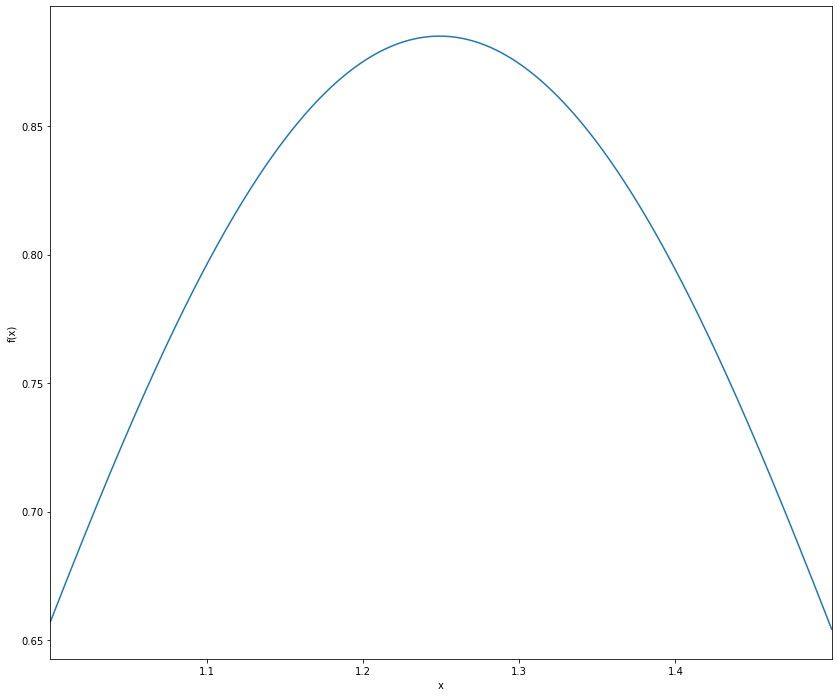

In [18]:
print('Восставновим равномерное  распределение')
plot(uniform_sample)

Восставновим экспоненциальное распределение


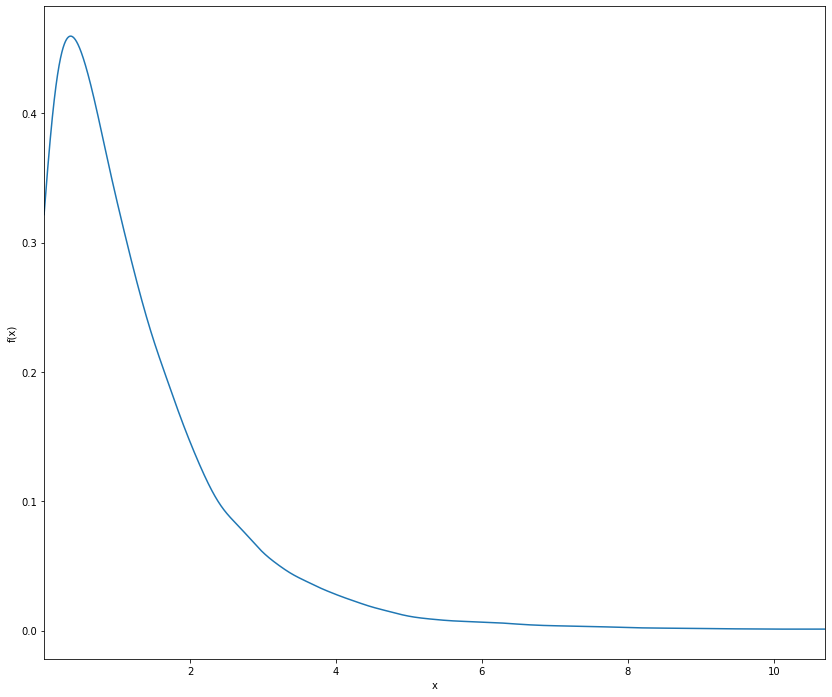

In [ ]:
print('Восставновим экспоненциальное распределение')
plot(exponential_sample)

Восставновим распределение Вейбула


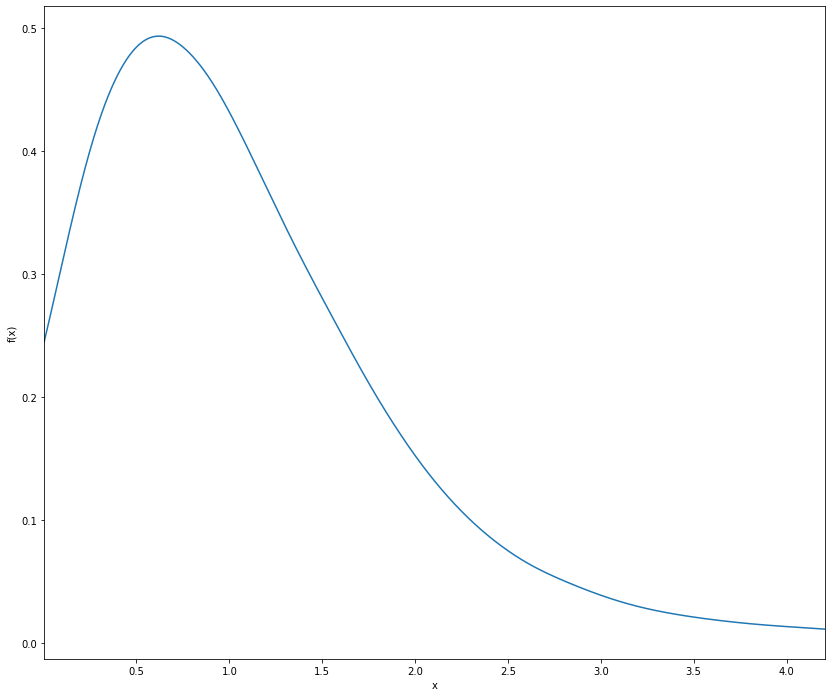

In [ ]:
print('Восставновим распределение Вейбула')
plot(Weibull_sample)